In [26]:
# Import the libraries we will be using
import os
import numpy as np
import pandas as pd
import math
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from IPython.display import Image
%matplotlib inline
from pandas import DataFrame, read_sql
import pandas as pd
import sqlite3

In [13]:
con = sqlite3.connect("censys.db")

gov_sql = '''SELECT *
                FROM gov
                '''

zip_sql = '''SELECT *
                FROM zip
                '''

country_sql = '''SELECT *
                FROM country
                '''

df_gov = pd.read_sql(gov_sql, con)
df_zip = pd.read_sql(zip_sql, con)
#df_country = pd.read_sql(country_sql, con)
df_gov['val_start'] = df_gov['val_start'].astype("datetime64")
df_zip['val_start'] = df_zip['val_start'].astype("datetime64")
#df_country['val_start'] = df_country['val_start'].astype("datetime64")

print len(df_gov),len(df_zip)

10000 3651


In [2]:
df_gov['label'] = 1
df_zip['label'] = 0
#df_country['label'] = 0
df_combined = df_gov.append(df_zip)
df_combined

,sha256,content,subject_c,subject_o,subject_cn,is$uer_c,issuer_o,signing_algorithm,self_signed,key_algorithm,...,va$_length,enc_only,cert_sign,key_enc,digi_sign,cont_commit,dec_only,key_agreem,data_enc,label
0,02f794d9694e684c570e244840cb7e2904882b778d7e6b...,"C=US, ST=Virginia, L=Arlington, O=National Sci...",US,National Science Foundation,science360.gov,US,Symantec Corporation,SHA256WithRSA,0,RSA,...,31708799.0,0,0,1,1,0,0,0,0,1
1,1ed3fd1efa60f91960d05a992f01b2a75d3faa45d8d1a9...,"C=US, ST=Washington, L=Seattle, O=Amazon.com I...",US,Amazon.com Inc.,*.s3-us-gov-west-1.amazonaws.com,US,DigiCert Inc,SHA256WithRSA,0,RSA,...,28425292.0,0,0,1,1,0,0,0,0,1
2,de43cfc922722551b8ba7147aa3036d53ae30a8c8734b9...,"O=mail.flcourts1.gov, OU=Domain Control Valida...",,mail.flcourts1.gov,mail.flcourts1.gov,US,GoDaddy.com,SHA1WithRSA,0,RSA,...,157766400.0,0,0,1,1,0,0,0,0,1
3,f6a1696e872b623a73203b573a9bcff47a8eace4df35dc...,"OU=Domain Control Validated, CN=mail.flcourts1...",,,mail.flcourts1.gov,US,GoDaddy.com,SHA256WithRSA,0,RSA,...,88407911.0,0,0,1,1,0,0,0,0,1
4,14538f421d470d55eed49387a310178bd162439638184e...,"C=US, ST=Virginia, L=Arlington, O=National Sci...",US,National Science Foundation,science360.gov,US,Symantec Corporation,SHA256WithRSA,0,RSA,...,31708799.0,0,0,1,1,0,0,0,0,1
5,64c0382bae3b64433f6cf7f55f2a6a6f6517dc42c7e28a...,"C=US, ST=Washington, L=Seattle, O=Amazon.com I...",US,Amazon.com Inc.,*.s3-fips-us-gov-west-1.amazonaws.com,US,DigiCert Inc,SHA256WithRSA,0,RSA,...,29030092.0,0,0,1,1,0,0,0,0,1
6,799d69393e65d5197f4836616c273b746340f6fbde6ef6...,"C=US, ST=District Of Columbia, L=Washington, O...",US,General Services Administration,www.section508.gov,US,GeoTrust Inc.,SHA256WithRSA,0,RSA,...,31622399.0,0,0,1,1,0,0,0,0,1
7,de3b9fa8451fe5743c37fc753d3637c2c2f132a281cd7b...,"C=US, ST=District Of Columbia, L=Washington, O...",US,General Services Administration,www.section508.gov,US,GeoTrust Inc.,SHA256WithRSA,0,RSA,...,31622399.0,0,0,1,1,0,0,0,0,1
8,3c463bc72e5e7b2faa2ed3ebac4fe4f07bdd1c3c391500...,"C=US, ST=Washington, L=Seattle, O=Amazon.com, ...",US,Amazon.com,kms.us-gov-west-1.amazonaws.com,US,Symantec Corporation,SHA256WithRSA,0,RSA,...,NaN,0,0,1,1,0,0,0,0,1
9,450b7781bfc82b3bb74fd16d01cf0b4a48a4c029e70069...,CN=online-hmrc-gov-co.uk,,,online-hmrc-gov-co.uk,US,GeoTrust Inc.,SHA256WithRSA,0,RSA,...,31622399.0,0,0,1,1,0,0,0,0,1


In [3]:
def map_values_to_nums(dataframe, df_column):
    value_num_map = {}
    count = 1
    for x in df_column:
        if x not in value_num_map:
            value_num_map[x] = count
            count += 1
    value_num_list = []
    for x in df_column:
        value_num_list.append(value_num_map[x])
    dataframe[df_column.name+"_nums"] = value_num_list
    return dataframe, value_num_map

def map_values_to_nums_all(dataframe):
    dataframe, signing_algo_dict = map_values_to_nums(dataframe,dataframe.signing_algorithm)
    dataframe, key_algo_dict = map_values_to_nums(dataframe,dataframe.key_algorithm)
    dataframe, subject_c_dict = map_values_to_nums(dataframe,dataframe.subject_c)
    dataframe, subject_o_dict = map_values_to_nums(dataframe, dataframe.subject_o)
    dataframe, issuer_c_dict = map_values_to_nums(dataframe, dataframe['is$uer_c'])
    dataframe, issuer_o_dict = map_values_to_nums(dataframe, dataframe.issuer_o)
    result = {}
    result["signing_algo_dict"] = signing_algo_dict 
    result["key_algo_dict"] = key_algo_dict
    result["subject_c_dict"] = subject_c_dict
    result["subject_o_dict"] = subject_o_dict
    result["issuer_c_dict"] = issuer_c_dict
    result["issuer_o_dict"] = issuer_o_dict
    return result

In [4]:
result = map_values_to_nums_all(df_combined)

In [5]:
def entropy(target):
    # Get the number of users
    n = len(target)
    # Count how frequently each unique value occurs
    counts = np.bincount(target).astype(float)
    # Initialize entropy
    entropy = 0
    # If the split is perfect, return 0
    if len(counts) <= 1 or 0 in counts:
        return entropy
    # Otherwise, for each possible value, update entropy
    for count in counts:
        entropy += math.log(count/n, len(counts)) * count/n
    # Return entropy
    return -1 * entropy

def information_gain(feature, threshold, target):
    # Dealing with numpy arrays makes this slightly easier
    target = np.array(target)
    feature = np.array(feature)
    # Cut the feature vector on the threshold
    feature = (feature < threshold)
    # Initialize information gain with the parent entropy
    ig = entropy(target)
    # For both sides of the threshold, update information gain
    for level, count in zip([0, 1], np.bincount(feature).astype(float)):
        ig -= count/len(feature) * entropy(target[feature == level])
    # Return information gain
    return ig

def best_threshold(feature, X, Y):
    maximum_ig = 0
    maximum_threshold = 0

    for threshold in X[feature]:
        ig = information_gain(X[feature], threshold, np.array(Y))
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = threshold

    return "The maximum IG of %s = %.3f and it occured by splitting on %.4f." % (feature, maximum_ig, maximum_threshold)

def Decision_Tree_Image(decision_tree, feature_names, name="temp"):
    # Export our decision tree to graphviz format
    dot_file = tree.export_graphviz(decision_tree.tree_, out_file='images/' + name + '.dot', feature_names=feature_names)
#     with open("images/temp.dot", 'w') as f:
#         tree.export_graphviz(decision_tree.tree_, out_file=f, feature_names=feature_names)
    # Call graphviz to make an image file from our decision tree
    os.system("dot -Tpng images/" + name + ".dot -o images/" + name + ".png")
    
    # Return the .png image so we can see it
    return Image(filename='images/' + name + '.png')

In [6]:
df_combined.columns

Index([u'sha256', u'content', u'subject_c', u'subject_o', u'subject_cn',
       u'is$uer_c', u'issuer_o', u'signing_algorithm', u'self_signed',
       u'key_algorithm', u'val_start', u'va$_length', u'enc_only',
       u'cert_sign', u'key_enc', u'digi_sign', u'cont_commit', u'dec_only',
       u'key_agreem', u'data_enc', u'label', u'signing_algorithm_nums',
       u'key_algorithm_nums', u'subject_c_nums', u'subject_o_nums',
       u'is$uer_c_nums', u'issuer_o_nums'],
      dtype='object')

In [7]:
X = df_combined[['self_signed', 'cert_sign', 'key_enc', 'digi_sign', 'key_agreem', 'data_enc', 'signing_algorithm_nums', 'key_algorithm_nums', 'subject_c_nums', 'subject_o_nums', 'is$uer_c_nums', 'issuer_o_nums']]
Y = df_combined['label']

In [8]:
for x in X:
    print best_threshold(x, X, Y)

The maximum IG of self_signed = 0.019 and it occured by splitting on 1.0000.
The maximum IG of cert_sign = 0.020 and it occured by splitting on 1.0000.
The maximum IG of key_enc = 0.043 and it occured by splitting on 1.0000.
The maximum IG of digi_sign = 0.025 and it occured by splitting on 1.0000.
The maximum IG of key_agreem = 0.000 and it occured by splitting on 1.0000.
The maximum IG of data_enc = 0.002 and it occured by splitting on 1.0000.
The maximum IG of signing_algorithm_nums = 0.037 and it occured by splitting on 3.0000.
The maximum IG of key_algorithm_nums = 0.045 and it occured by splitting on 2.0000.
The maximum IG of subject_c_nums = 0.059 and it occured by splitting on 6.0000.
The maximum IG of subject_o_nums = 0.097 and it occured by splitting on 2210.0000.
The maximum IG of is$uer_c_nums = 0.076 and it occured by splitting on 3.0000.
The maximum IG of issuer_o_nums = 0.069 and it occured by splitting on 9.0000.


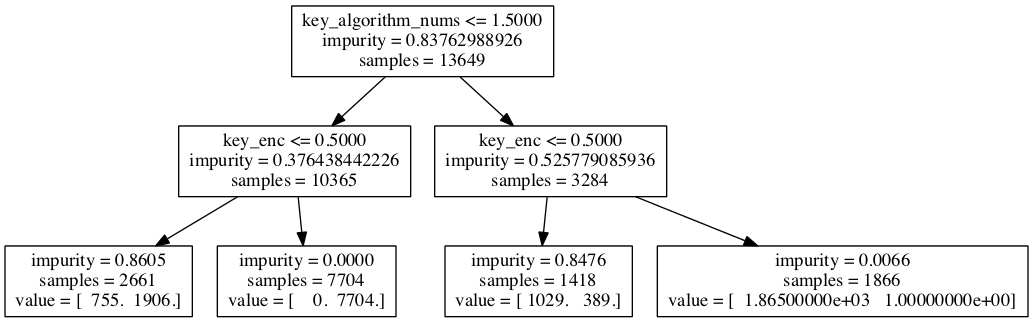

In [73]:
decision_tree = DecisionTreeClassifier(max_depth=2, criterion="entropy")
decision_tree.fit(X, Y)
# Visualize your decision tree with functions from the lab session
Decision_Tree_Image(decision_tree, X.columns)

In [19]:
k_range = list(range(1, 16))
k_scores_accuracy = []
k_scores_recall = []

for k in k_range:
    dt = DecisionTreeClassifier(max_depth=k, criterion="entropy")
    scores = cross_val_score(dt, X, Y, cv=10, scoring='accuracy')
    scores1 = cross_val_score(dt, X, Y, cv=10, scoring='recall')
    k_scores_accuracy.append(scores.mean())
    k_scores_recall.append(scores1.mean())
print k_scores_accuracy, k_scores_recall

[0.71144723504899199, 0.72507360867536552, 0.80660504454062276, 0.78235472677639584, 0.80140191677526962, 0.78689642226977519, 0.79700491797124307, 0.79304935669503751, 0.79854407671391558, 0.80059546602738396, 0.79927651655323684, 0.79854402308282246, 0.79876380330260266, 0.80044878498758432, 0.80044867772539807] [0.89680000000000004, 0.91739999999999999, 0.86009999999999986, 0.80209999999999992, 0.79410000000000003, 0.81089999999999995, 0.8015000000000001, 0.80169999999999997, 0.78859999999999997, 0.79579999999999995, 0.79630000000000001, 0.79390000000000005, 0.79349999999999998, 0.79659999999999997, 0.79569999999999996]


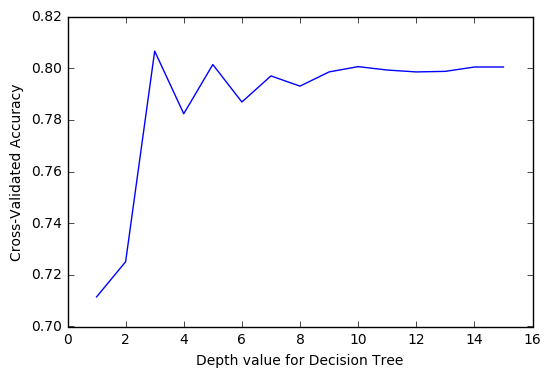

In [20]:
plt.plot(k_range, k_scores_accuracy)
plt.xlabel('Depth value for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

In [17]:
k_range = list(range(1, 16))
k_scores_rf_accuracy = []
k_scores_rf_recall = []

for k in k_range:
    rf = RandomForestClassifier(max_depth=k, criterion="entropy")
    scores = cross_val_score(rf, X, Y, cv=10, scoring='accuracy')
    scores1 = cross_val_score(rf, X, Y, cv=10, scoring='recall')
    k_scores_rf_accuracy.append(scores.mean())
    k_scores_rf_recall.append(scores1.mean())
print k_scores_rf_accuracy, k_scores_rf_recall

[0.7489563925581495, 0.72631902992078679, 0.76000959996567607, 0.77524833877688926, 0.77817874170729229, 0.79627397980253034, 0.79876439324462756, 0.7986183021468527, 0.79847140658268034, 0.80433221244348618, 0.8023544049898369, 0.80623611625075742, 0.80872701237269307, 0.8052103143318371, 0.80726175727639848] [0.99670000000000003, 0.94809999999999994, 0.90820000000000012, 0.8858999999999998, 0.87229999999999985, 0.83329999999999982, 0.82809999999999984, 0.82150000000000001, 0.81259999999999999, 0.8076000000000001, 0.80950000000000011, 0.80000000000000004, 0.80709999999999993, 0.7974, 0.80749999999999988]


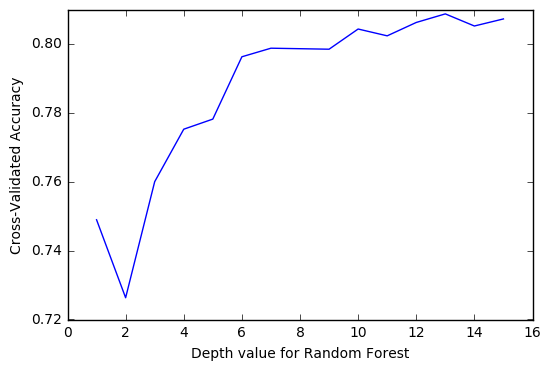

In [18]:
plt.plot(k_range, k_scores_rf_accuracy)
plt.xlabel('Depth value for Random Forest')
plt.ylabel('Cross-Validated Accuracy')

In [24]:
log_model = LogisticRegression()
scores_log = cross_val_score(log_model, X, Y, cv=10, scoring='accuracy')
#scores1 = cross_val_score(log_model, X, Y, cv=10, scoring='recall')
print scores_log.mean()

0.739351117404


In [27]:
svm_model = SVC()
scores_svm = cross_val_score(svm_model, X, Y, cv=10, scoring='accuracy')
#scores1 = cross_val_score(log_model, X, Y, cv=10, scoring='recall')
print scores_svm.mean()

0.802794179954


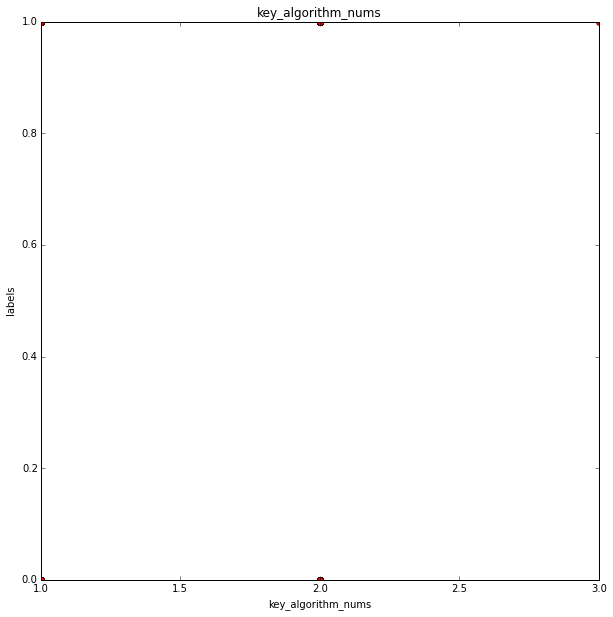

In [115]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(X['key_algorithm_nums'], Y, "ro")
plt.xlabel('key_algorithm_nums')
plt.ylabel('labels')
plt.title('key_algorithm_nums')
plt.show()